In [1]:
# Importa las librerías necesarias y carga tus datos
import pandas as pd
import numpy as np


In [2]:
# Abre el archivo CSV
data_items = pd.read_csv(r'C:\Users\juana\Desktop\Cursos Python\HENRY\Proyecto 1\DATASET\datos_items.csv')

# Muestra el contenido del DataFrame
print(data_items)


                       user_id  items_count           steam_id  \
0            76561197970982479          277  76561197970982479   
1                      js41637          888  76561198035864385   
2                    evcentric          137  76561198007712555   
3                   Riot-Punch          328  76561197963445855   
4                        doctr          541  76561198002099482   
...                        ...          ...                ...   
87621        76561198323066619           22  76561198323066619   
87622        76561198326700687          177  76561198326700687   
87623  XxLaughingJackClown77xX            0  76561198328759259   
87624        76561198329548331            7  76561198329548331   
87625        edward_tremethick            0  76561198331598578   

                                                   items  playtime_forever  \
0      [{'item_id': '10', 'item_name': 'Counter-Strik...                 6   
1      [{'item_id': '10', 'item_name': 'Counter-Str

In [3]:
# Abre el archivo CSV
data_games = pd.read_csv(r'C:\Users\juana\Desktop\Cursos Python\HENRY\Proyecto 1\DATASET\limpio_games.csv')

# Muestra el contenido del DataFrame
print(data_games)


          publisher      genres             app_name                title  \
0         Kotoshiro      Action  Lost Summoner Kitty  Lost Summoner Kitty   
1         Kotoshiro      Casual  Lost Summoner Kitty  Lost Summoner Kitty   
2         Kotoshiro       Indie  Lost Summoner Kitty  Lost Summoner Kitty   
3         Kotoshiro  Simulation  Lost Summoner Kitty  Lost Summoner Kitty   
4         Kotoshiro    Strategy  Lost Summoner Kitty  Lost Summoner Kitty   
...             ...         ...                  ...                  ...   
57577  Laush Studio       Indie        Russian Roads        Russian Roads   
57578  Laush Studio      Racing        Russian Roads        Russian Roads   
57579  Laush Studio  Simulation        Russian Roads        Russian Roads   
57580      SIXNAILS      Casual  EXIT 2 - Directions  EXIT 2 - Directions   
57581      SIXNAILS       Indie  EXIT 2 - Directions  EXIT 2 - Directions   

                                                     url release_date  \
0 

In [4]:
# Abre el archivo CSV
data_reviews = pd.read_csv(r'C:\Users\juana\Desktop\Cursos Python\HENRY\Proyecto 1\DATASET\limpio_reviews.csv')

# Muestra el contenido del DataFrame
print(data_reviews)

                 user_id  item_id  \
0      76561197970982479     1250   
1      76561197970982479    22200   
2      76561197970982479    43110   
3                js41637   251610   
4                js41637   227300   
...                  ...      ...   
59300  76561198312638244       70   
59301  76561198312638244   362890   
59302        LydiaMorley   273110   
59303        LydiaMorley      730   
59304        LydiaMorley      440   

                                               helpful  recommend  \
0                                       No ratings yet       True   
1                                       No ratings yet       True   
2                                       No ratings yet       True   
3      15 of 20 people (75%) found this review helpful       True   
4         0 of 1 people (0%) found this review helpful       True   
...                                                ...        ...   
59300                                   No ratings yet       True   
593

In [5]:

# Renombrar la columna 'id' a 'item_id' en data_games
data_games.rename(columns={'id': 'item_id'}, inplace=True)

# Ahora la columna 'id' se llama 'item_id'

# Puedes verificar el cambio imprimiendo los nombres de las columnas
print(data_games.columns)


# Supongamos que tienes tus DataFrames data_games y data_reviews con 'id' renombrada a 'item_id'.

# Realiza la fusión (merge) en función de la columna 'item_id'
result = data_reviews.merge(data_games, on='item_id', how='inner')
result.columns


Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'reviews_url', 'specs', 'price', 'item_id', 'developer'],
      dtype='object')


Index(['user_id', 'item_id', 'helpful', 'recommend', 'review', 'year_posted',
       'sentiment_analysis', 'publisher', 'genres', 'app_name', 'title', 'url',
       'release_date', 'tags', 'reviews_url', 'specs', 'price', 'developer'],
      dtype='object')

In [6]:
data_items.columns

Index(['user_id', 'items_count', 'steam_id', 'items', 'playtime_forever',
       'playtime_2weeks', 'item_id'],
      dtype='object')

In [7]:
result.columns


Index(['user_id', 'item_id', 'helpful', 'recommend', 'review', 'year_posted',
       'sentiment_analysis', 'publisher', 'genres', 'app_name', 'title', 'url',
       'release_date', 'tags', 'reviews_url', 'specs', 'price', 'developer'],
      dtype='object')

In [8]:

# Unir tabla1 y tabla2 en función de user_id
tabla1_y_2 = pd.merge(result, data_items, on='user_id', how='inner')
tablas = tabla1_y_2

tablas.columns

Index(['user_id', 'item_id_x', 'helpful', 'recommend', 'review', 'year_posted',
       'sentiment_analysis', 'publisher', 'genres', 'app_name', 'title', 'url',
       'release_date', 'tags', 'reviews_url', 'specs', 'price', 'developer',
       'items_count', 'steam_id', 'items', 'playtime_forever',
       'playtime_2weeks', 'item_id_y'],
      dtype='object')

In [9]:

# Eliminar filas con "id" repetidos y mantener la primera aparición
df_sin_repetidos = tablas.drop_duplicates(subset='user_id', keep='first')

# Imprimir el DataFrame resultante
print(df_sin_repetidos)


                  user_id  item_id_x  \
0       76561197970982479       1250   
3            death-hunter       1250   
7                DJKamBer       1250   
18              diego9031       1250   
45      76561198081962345       1250   
...                   ...        ...   
123434     laislabonita75     367780   
123438    evilindiegaming     367780   
123440          Gamer0009     306040   
123444        llDracuwulf     307130   
123447       ChrisCoroner     209120   

                                                helpful  recommend  \
0                                        No ratings yet       True   
3                                        No ratings yet       True   
7                                        No ratings yet       True   
18                                       No ratings yet       True   
45                                       No ratings yet       True   
...                                                 ...        ...   
123434  16 of 19 people (84%)

In [10]:
tablas = df_sin_repetidos

In [11]:
tablas.columns

Index(['user_id', 'item_id_x', 'helpful', 'recommend', 'review', 'year_posted',
       'sentiment_analysis', 'publisher', 'genres', 'app_name', 'title', 'url',
       'release_date', 'tags', 'reviews_url', 'specs', 'price', 'developer',
       'items_count', 'steam_id', 'items', 'playtime_forever',
       'playtime_2weeks', 'item_id_y'],
      dtype='object')

In [12]:
# False = puede tener datos nulos o faltantes (no hay celdas vacias ni NaN)
print(tablas[['user_id', 'item_id_x', 'helpful', 'recommend', 'review', 'year_posted',
       'sentiment_analysis', 'publisher', 'genres', 'app_name', 'title', 'url',
       'release_date', 'tags', 'reviews_url', 'specs', 'price', 'developer',
       'items_count', 'steam_id', 'items', 'playtime_forever',
       'playtime_2weeks', 'item_id_y']].all(axis=0))

user_id                True
item_id_x              True
helpful                True
recommend             False
review                 True
year_posted            True
sentiment_analysis    False
publisher              True
genres                 True
app_name               True
title                  True
url                    True
release_date           True
tags                   True
reviews_url            True
specs                  True
price                 False
developer              True
items_count           False
steam_id               True
items                  True
playtime_forever      False
playtime_2weeks       False
item_id_y             False
dtype: bool


In [13]:
# Selecciona las columnas deseadas
columnas_deseadas = ['sentiment_analysis', 'items_count', 'recommend', 'genres', 'review', 'title', 'price', 'developer']

# Crea un nuevo DataFrame con las columnas seleccionadas
nuevo_dataframe = tablas.loc[:, columnas_deseadas]
tablas = nuevo_dataframe
tablas

,sentiment_analysis,items_count,recommend,genres,review,title,price,developer
0,2,277,True,Action,Simple yet with great replayability. In my opi...,Killing Floor,19.99,Tripwire Interactive
3,2,121,True,Action,"Amazing, Non-stop action of blowing stuff to b...",Killing Floor,19.99,Tripwire Interactive
7,0,152,True,Action,"Compared to Left 4 Dead 2, this game REALLY gi...",Killing Floor,19.99,Tripwire Interactive
18,2,200,True,Action,Jogo ♥♥♥♥.,Killing Floor,19.99,Tripwire Interactive
45,2,95,True,Action,cara nas imagens esse jogo da pouco de medo ma...,Killing Floor,19.99,Tripwire Interactive
...,...,...,...,...,...,...,...,...
123434,2,10,True,Action,The game is a good game. I might understand th...,Aero's Quest,4.99,"Soloweb Studios,Ravens Eye Studio"
123438,2,18,True,Action,I can understand why Aero's Quest brings out s...,Aero's Quest,4.99,"Soloweb Studios,Ravens Eye Studio"
123440,2,0,True,Casual,"Simple and fun, great art work.",The Howler,1.99,"Antanas Marcelionis,Renė Petrulienė"
123444,2,14,True,Action,"Asteria is a fast paced indie platformer, wrap...",Asteria,4.99,Legend Studio


In [14]:
tablas.columns

Index(['sentiment_analysis', 'items_count', 'recommend', 'genres', 'review',
       'title', 'price', 'developer'],
      dtype='object')

In [15]:
# Cantidad de valores nulos (NaN) en el DataFrame
nulos = tablas.isna().sum().sum()

# Cantidad de valores repetidos en la columna 'id'
#repetidos = tablas['tiasdfasdf'].duplicated().sum()

# Cantidad de celdas vacías en el DataFrame
celdas_vacias = tablas.isnull().sum().sum()

print("Cantidad de valores nulos (NaN):", nulos)
#print("Cantidad de valores repetidos en la columna 'id':", repetidos)
print("Cantidad de celdas vacías:", celdas_vacias)


Cantidad de valores nulos (NaN): 15
Cantidad de celdas vacías: 15


In [16]:
# Elimina las filas con valores NaN
tablas = tablas.dropna()

# Ahora, 'df' contendrá solo las filas que no tienen valores NaN
tablas.columns 

Index(['sentiment_analysis', 'items_count', 'recommend', 'genres', 'review',
       'title', 'price', 'developer'],
      dtype='object')

EDA
1. **Obtención de Datos**: En este paso, se recopilan los datos necesarios para el análisis. Pueden provenir de diversas fuentes, como bases de datos, archivos CSV, API, etc.

2. **Exploración Inicial de Datos**: Echa un vistazo rápido a los datos para comprender su estructura y formato. Esto incluye verificar el número de filas y columnas, así como los tipos de datos en cada columna.

3. **Limpieza de Datos**: Identifica y trata los valores faltantes (NaN) y los datos atípicos (outliers). Esto implica rellenar los valores faltantes o eliminar las filas o columnas que no son relevantes.

4. **Análisis Descriptivo**: Calcula estadísticas descriptivas, como la media, la mediana, la desviación estándar, y crea gráficos para visualizar la distribución de los datos.

5. **Análisis Univariado**: Examina cada variable por separado para comprender su comportamiento individual. Esto puede incluir histogramas, gráficos de barras, y estadísticas descriptivas específicas de cada variable.

6. **Análisis Bivariado**: Explora las relaciones entre dos variables. Esto implica la creación de gráficos de dispersión y el cálculo de correlaciones para identificar posibles asociaciones.

7. **Análisis Multivariado**: Examina las relaciones entre más de dos variables a la vez. Puedes utilizar técnicas como el análisis de componentes principales (PCA) o visualizaciones 3D para comprender mejor las interacciones entre las variables.

8. **Visualización de Datos**: Utiliza gráficos y visualizaciones para representar los resultados del análisis. Esto ayuda a comunicar tus hallazgos de manera efectiva.

9. **Conclusiones**: Resume tus observaciones y conclusiones principales. ¿Qué has aprendido sobre tus datos? ¿Hay patrones, tendencias o insights interesantes?

10. **Presentación de Resultados**: Comparte tus hallazgos de manera clara y concisa, ya sea en informes, presentaciones o visualizaciones interactivas.



- `sentiment_analysis`: Esta columna parece contener valores numéricos que podrían representar una puntuación de análisis de sentimiento. Los valores son 0 1 2.

- `items_count`: Cantidad de tiems.

- `recommend`: Recomendación el producto.

- `genres`: género del juego, como "Action" etc.

- `review`: Esta columna contiene texto, que parece ser una revisión o comentario de un usuario sobre el juego. 

- `title`: Esta columna contiene el título del juego, ejemplo es "Killing Floor".

- `price`: Esta columna contiene información sobre el precio del juego, con valores como 19.99 en U$S.

- `developer`: Esta columna parece contener el nombre del desarrollador del juego.

In [17]:
tablas

,sentiment_analysis,items_count,recommend,genres,review,title,price,developer
0,2,277,True,Action,Simple yet with great replayability. In my opi...,Killing Floor,19.99,Tripwire Interactive
3,2,121,True,Action,"Amazing, Non-stop action of blowing stuff to b...",Killing Floor,19.99,Tripwire Interactive
7,0,152,True,Action,"Compared to Left 4 Dead 2, this game REALLY gi...",Killing Floor,19.99,Tripwire Interactive
18,2,200,True,Action,Jogo ♥♥♥♥.,Killing Floor,19.99,Tripwire Interactive
45,2,95,True,Action,cara nas imagens esse jogo da pouco de medo ma...,Killing Floor,19.99,Tripwire Interactive
...,...,...,...,...,...,...,...,...
123434,2,10,True,Action,The game is a good game. I might understand th...,Aero's Quest,4.99,"Soloweb Studios,Ravens Eye Studio"
123438,2,18,True,Action,I can understand why Aero's Quest brings out s...,Aero's Quest,4.99,"Soloweb Studios,Ravens Eye Studio"
123440,2,0,True,Casual,"Simple and fun, great art work.",The Howler,1.99,"Antanas Marcelionis,Renė Petrulienė"
123444,2,14,True,Action,"Asteria is a fast paced indie platformer, wrap...",Asteria,4.99,Legend Studio


In [18]:
# Analisis Descriptivo de las numéricas. 
# Selecciona solo las columnas numéricas
columnas_numericas = tablas.select_dtypes(include=['int64', 'float64'])

# Calcula estadísticas descriptivas
tablas_describe = columnas_numericas.describe()

# Imprime las estadísticas descriptivas
print(tablas_describe)


       sentiment_analysis   items_count         price
count        23049.000000  23049.000000  23049.000000
mean             1.723893    102.882338     13.327653
std              0.689928    180.658476     12.869365
min              0.000000      0.000000      0.000000
25%              2.000000     29.000000      0.000000
50%              2.000000     66.000000     14.990000
75%              2.000000    125.000000     19.990000
max              2.000000   7762.000000    189.960000


Análisis Univariado: Examina cada variable por separado para comprender su comportamiento individual. Esto puede incluir histogramas, gráficos de barras, y estadísticas descriptivas específicas de cada variable.

Análisis Bivariado: Explora las relaciones entre dos variables. Esto implica la creación de gráficos de dispersión y el cálculo de correlaciones para identificar posibles asociaciones.

Análisis Multivariado: Examina las relaciones entre más de dos variables a la vez. Puedes utilizar técnicas como el análisis de componentes principales (PCA) o visualizaciones 3D para comprender mejor las interacciones entre las variables.

Visualización de Datos: Utiliza gráficos y visualizaciones para representar los resultados del análisis. Esto ayuda a comunicar tus hallazgos de manera efectiva.

Conclusiones: Resume tus observaciones y conclusiones principales. ¿Qué has aprendido sobre tus datos? ¿Hay patrones, tendencias o insights interesantes?

Presentación de Resultados: Comparte tus hallazgos de manera clara y concisa, ya sea en informes, presentaciones o visualizaciones interactivas.

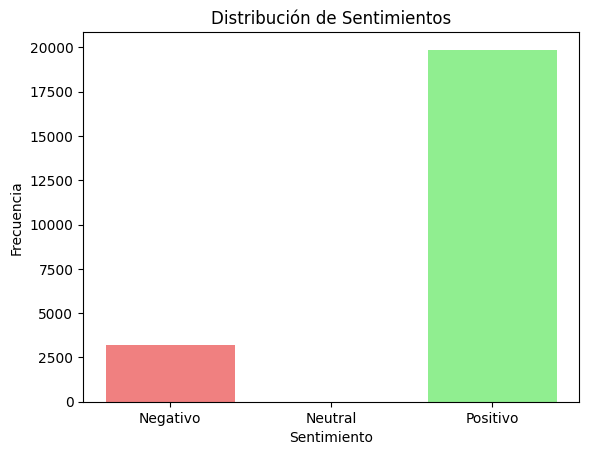

In [19]:
# Etapa del analisis Univariado

import matplotlib.pyplot as plt


# Cuenta la frecuencia de cada sentimiento
sentimiento_frecuencia = tablas['sentiment_analysis'].value_counts()

# Define las etiquetas y los valores
etiquetas = ['Negativo', 'Neutral', 'Positivo']
valores = [sentimiento_frecuencia.get(0, 0), sentimiento_frecuencia.get(1, 0), sentimiento_frecuencia.get(2, 0)]

# Crea un gráfico de barras
plt.bar(etiquetas, valores, color=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de Sentimientos')
plt.show()



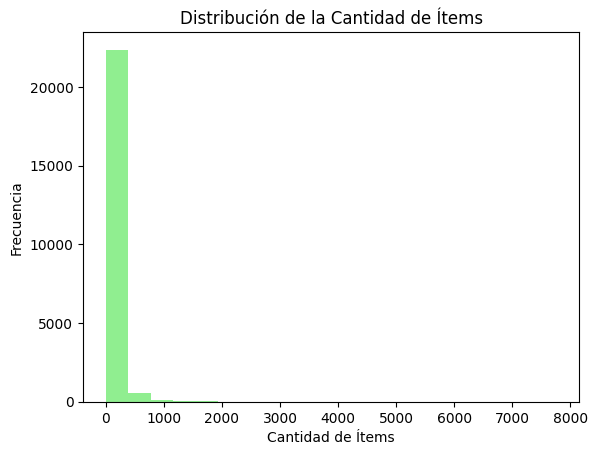

count    23049.000000
mean       102.882338
std        180.658476
min          0.000000
25%         29.000000
50%         66.000000
75%        125.000000
max       7762.000000
Name: items_count, dtype: float64


In [20]:

# Calcula estadísticas descriptivas
descripcion_items = tablas['items_count'].describe()

# Grafica un histograma
plt.hist(tablas['items_count'], bins=20, color='lightgreen')
plt.xlabel('Cantidad de Ítems')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Cantidad de Ítems')
plt.show()

# Imprime las estadísticas descriptivas
print(descripcion_items)


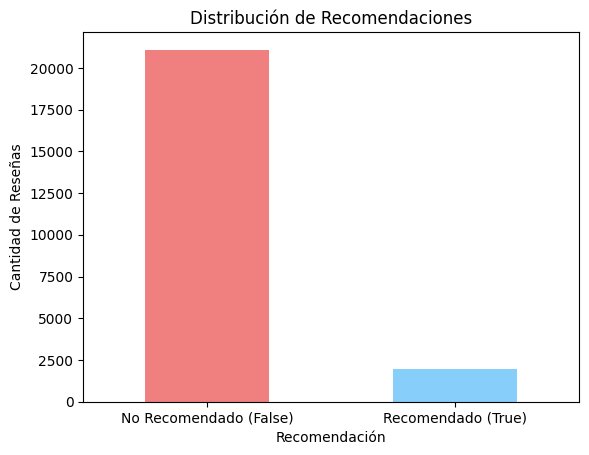

recommend
True     21083
False     1966
Name: count, dtype: int64


In [21]:

# Calcula la proporción de recomendaciones positivas y negativas
recomendaciones = tablas['recommend'].value_counts()

# Crea un gráfico de barras
recomendaciones.plot(kind='bar', color=['lightcoral', 'lightskyblue'])
plt.xlabel('Recomendación')
plt.ylabel('Cantidad de Reseñas')
plt.title('Distribución de Recomendaciones')
plt.xticks([0, 1], ['No Recomendado (False)', 'Recomendado (True)'], rotation=0)
plt.show()

# Imprime la proporción de recomendaciones
print(recomendaciones)


In [22]:
# Analisis Bivariado

# Calcula la media de 'sentiment_analysis' para reseñas recomendadas (True)
media_sentimiento_recomendado = tablas[tablas['recommend'] == True]['sentiment_analysis'].mean()

# Calcula la media de 'sentiment_analysis' para reseñas no recomendadas (False)
media_sentimiento_no_recomendado = tablas[tablas['recommend'] == False]['sentiment_analysis'].mean()

# Imprime las medias
print("Media de sentimiento para reseñas recomendadas:", media_sentimiento_recomendado)
print("Media de sentimiento para reseñas no recomendadas:", media_sentimiento_no_recomendado)


Media de sentimiento para reseñas recomendadas: 1.7791585637717593
Media de sentimiento para reseñas no recomendadas: 1.1312309257375381


In [23]:

# Calcula estadísticas descriptivas de los precios para cada género
estadisticas_por_genero = tablas.groupby('genres')['price'].describe()

# Imprime las estadísticas descriptivas
print(estadisticas_por_genero)


                             count       mean        std    min    25%    50%  \
genres                                                                          
Action                     18495.0  12.827372  12.711022   0.00   0.00  14.99   
Adventure                   1012.0  14.572036   9.645325   0.00   9.99  14.99   
Animation &amp; Modeling      39.0   0.768718   3.349603   0.00   0.00   0.00   
Casual                       390.0   6.178231   6.539828   0.00   0.00   4.99   
Design &amp; Illustration      6.0  71.656667   4.082483  69.99  69.99  69.99   
Free to Play                 218.0   5.904954  30.323516   0.00   0.00   0.00   
Indie                       1886.0  12.707694   8.038786   0.00   9.99   9.99   
Massively Multiplayer         18.0  19.990000   0.000000  19.99  19.99  19.99   
RPG                          295.0  25.969661   9.308009   3.99  19.99  29.99   
Racing                        60.0  22.557500  13.345778   0.00  19.99  19.99   
Simulation                  

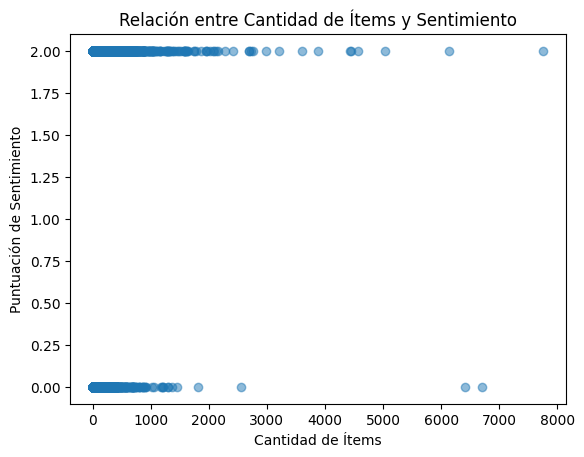

In [24]:

# Crea un gráfico de dispersión para visualizar la relación
plt.scatter(tablas['items_count'], tablas['sentiment_analysis'], alpha=0.5)
plt.xlabel('Cantidad de Ítems')
plt.ylabel('Puntuación de Sentimiento')
plt.title('Relación entre Cantidad de Ítems y Sentimiento')
plt.show()


In [25]:

# Calcula estadísticas descriptivas de los precios para reseñas recomendadas (True)
precios_recomendados = tablas[tablas['recommend'] == True]['price'].describe()

# Calcula estadísticas descriptivas de los precios para reseñas no recomendadas (False)
precios_no_recomendados = tablas[tablas['recommend'] == False]['price'].describe()

# Imprime las estadísticas descriptivas
print("Estadísticas de precios para reseñas recomendadas:")
print(precios_recomendados)
print("Estadísticas de precios para reseñas no recomendadas:")
print(precios_no_recomendados)


Estadísticas de precios para reseñas recomendadas:
count    21083.000000
mean        12.954448
std         12.054550
min          0.000000
25%          0.000000
50%         14.990000
75%         19.990000
max        160.910000
Name: price, dtype: float64
Estadísticas de precios para reseñas no recomendadas:
count    1966.000000
mean       17.329827
std        19.132915
min         0.000000
25%         0.000000
50%        14.990000
75%        19.990000
max       189.960000
Name: price, dtype: float64


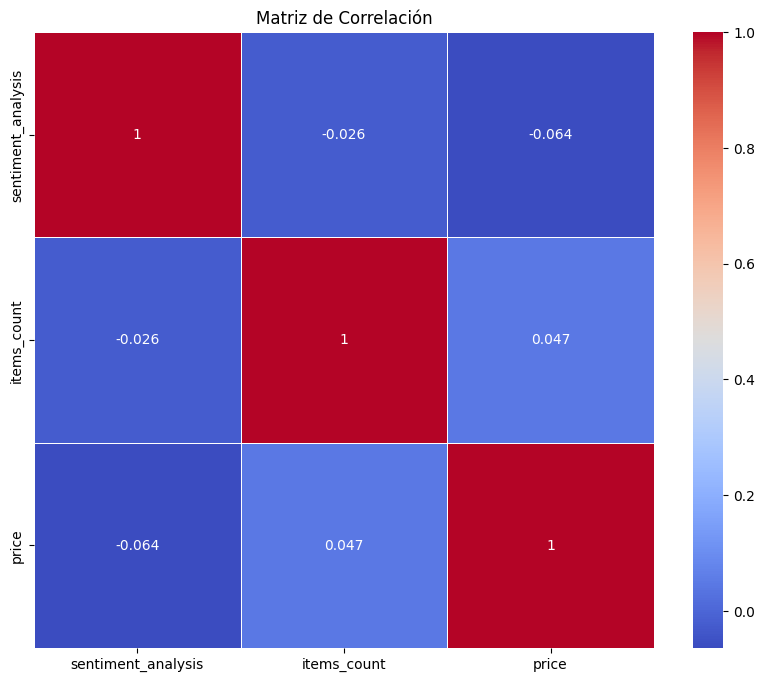

In [26]:

import seaborn as sns

# Calcula la matriz de correlación
correlacion = tablas[['sentiment_analysis', 'items_count', 'price']].corr()


# Crea un mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


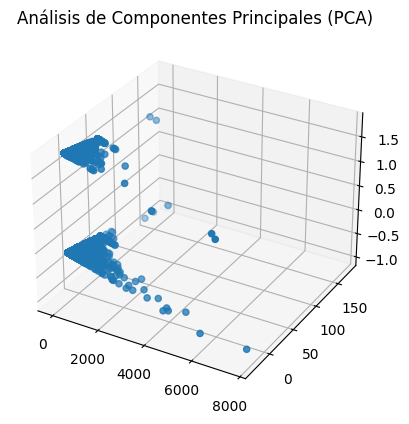

In [27]:

from sklearn.decomposition import PCA

# Selecciona las variables numéricas para aplicar PCA
variables_numericas = tablas[['sentiment_analysis', 'items_count', 'price']]

# Normaliza las variables (si es necesario)
# variables_normalizadas = (variables_numericas - variables_numericas.mean()) / variables_numericas.std()

# Aplica PCA
pca = PCA(n_components=3)
componentes_principales = pca.fit_transform(variables_numericas)

# Crea un gráfico 3D de las componentes principales
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(componentes_principales[:, 0], componentes_principales[:, 1], componentes_principales[:, 2])
plt.title('Análisis de Componentes Principales (PCA)')
plt.show()


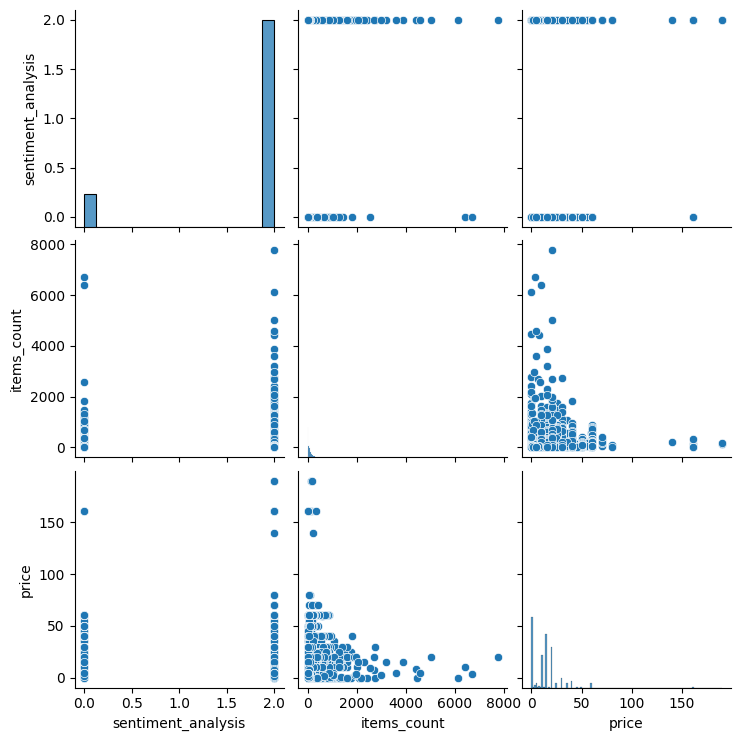

In [28]:

# Selecciona las variables numéricas para el gráfico de pares
variables_numericas = tablas[['sentiment_analysis', 'items_count', 'price']]

# Crea un gráfico de pares
sns.pairplot(variables_numericas)
plt.show()


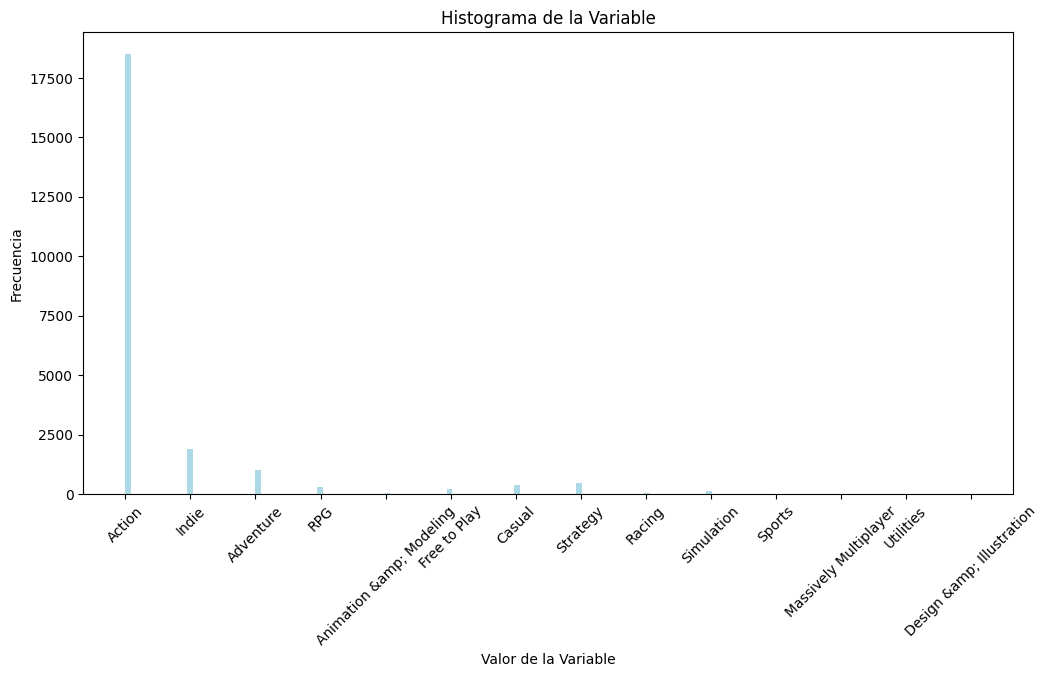

In [29]:
# Visualización de los datos


# Histograma
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura
plt.hist(tablas['genres'], bins=150, color='lightblue')
plt.xlabel('Valor de la Variable')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Variable')

# Rota los títulos del eje x a 45 grados
plt.xticks(rotation=45)

plt.show()


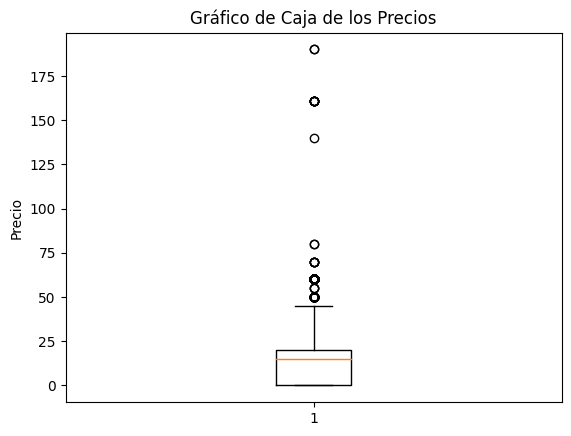

In [30]:

# Crea un gráfico de caja para 'price'
plt.boxplot(tablas['price'])
plt.ylabel('Precio')
plt.title('Gráfico de Caja de los Precios')
plt.show()


C:\Users\juana\AppData\Local\Temp\ipykernel_7212\3459209894.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=tablas, x='genres', y='price', inner='quart', palette='pastel')


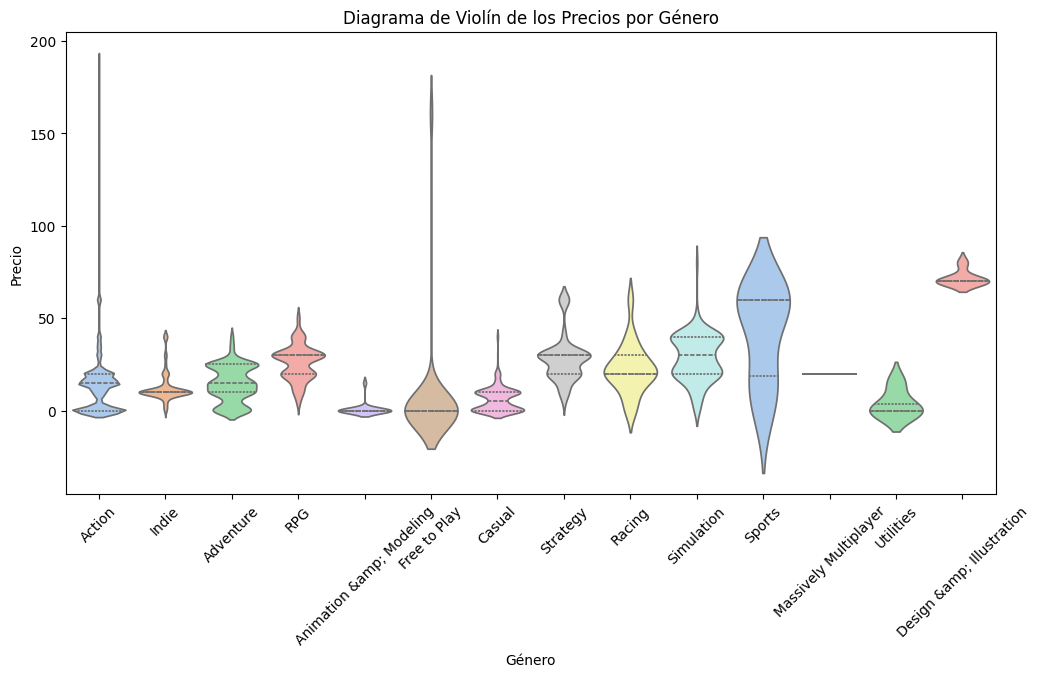

In [31]:

# Ajusta el tamaño de la figura para hacerla un poco más ancha
plt.figure(figsize=(12, 6))

# Crea un diagrama de violín para 'genres'
sns.violinplot(data=tablas, x='genres', y='price', inner='quart', palette='pastel')
plt.xlabel('Género')
plt.ylabel('Precio')
plt.title('Diagrama de Violín de los Precios por Género')
plt.xticks(rotation=45)  # Rota los títulos del eje x para una mejor visualización
plt.show()


In [33]:

# Ruta de archivo
tablas_EDA = 'tablas_Eda.csv'

# Utiliza el método to_csv() para guardar el DataFrame como un archivo CSV
tablas.to_csv(tablas_EDA, index=False)  